In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the retail sales dataset
retail_sales = pd.read_csv("retail_sales_dataset.csv", index_col = "Transaction ID")
retail_sales

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


In [5]:
# Checking for data types and correct any inconsistencies
retail_sales.info()

# Converting "Date" to datetime data type
retail_sales["Date"] = pd.to_datetime(retail_sales["Date"])

# Converting "Product Category" to category data type
# retail_sales["Product Category"] = retail_sales["Product Category"].astype("category")
retail_sales.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Customer ID       1000 non-null   object        
 2   Gender            1000 non-null   object        
 3   Age               1000 non-null   int64         
 4   Product Category  1000 non-null   object        
 5   Quantity          1000 non-null   int64         
 6   Price per Unit    1000 non-null   int64         
 7   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 70.3+ KB


,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
# Missing Data Handling

# Checking for missing values
retail_sales_missing = retail_sales.isnull().sum()
retail_sales_missing


Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
# Checking Duplicates
retail_sales.duplicated().sum()

0

In [8]:
# Descriptive Statistics
# Calculating basic statistics
retail_sales_mean = retail_sales[["Quantity","Price per Unit","Total Amount"]].mean()
retail_sales_median = retail_sales[["Quantity","Price per Unit","Total Amount"]].median()
retail_sales_mode = retail_sales[["Quantity","Price per Unit","Total Amount"]].mode().iloc[0]
retail_sales_std_dev = retail_sales[["Quantity","Price per Unit","Total Amount"]].std()

# Print Descriptive Statistics
print("Mean:\n", retail_sales_mean)
print("\nMedian:\n", retail_sales_median)
print("\nMode:\n", retail_sales_mode)
print("\nStandard Deviation:\n", retail_sales_std_dev)


Mean:
 Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
 Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
 Quantity           4
Price per Unit    50
Total Amount      50
Name: 0, dtype: int64

Standard Deviation:
 Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


In [9]:
retail_sales.columns

Index(['Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')

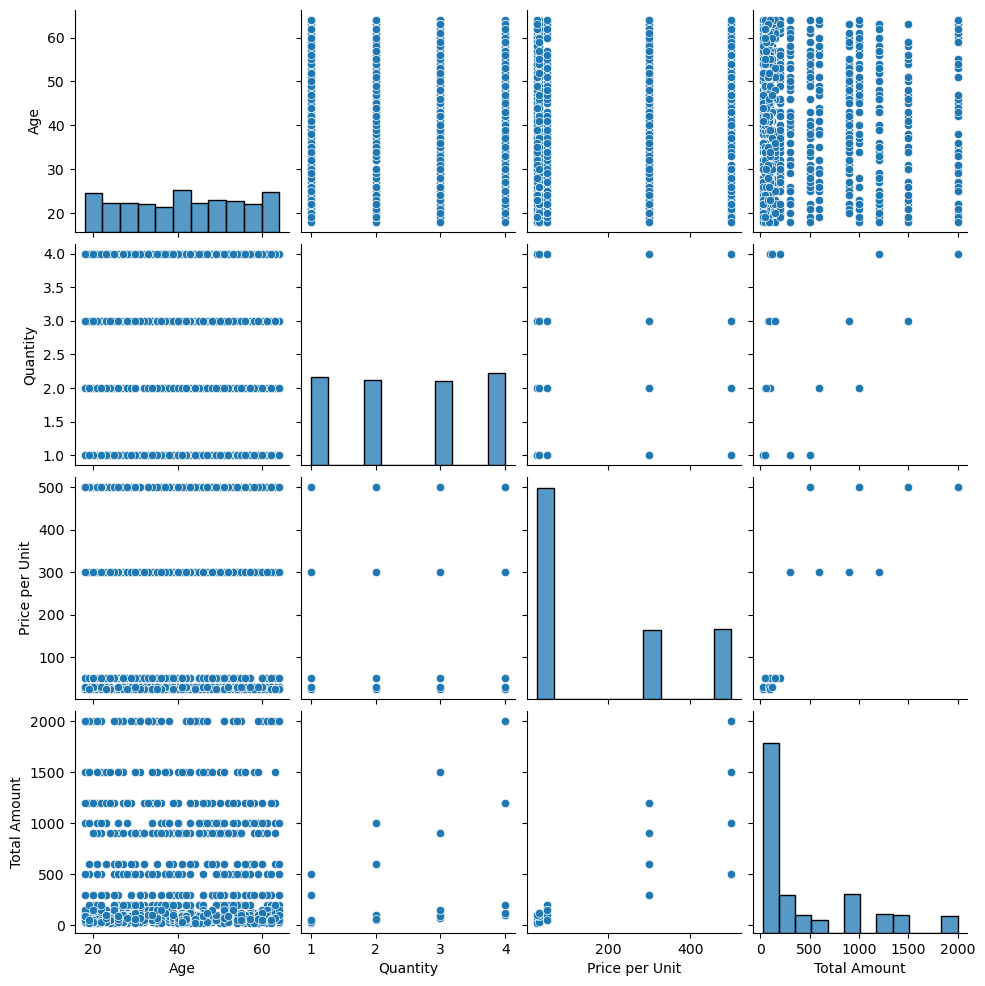

In [17]:
sns.pairplot(data = retail_sales)


C:\Users\kchuc\AppData\Local\Temp\ipykernel_11572\1406678678.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = retail_sales.resample("Y").sum()
C:\Users\kchuc\AppData\Local\Temp\ipykernel_11572\1406678678.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = retail_sales.resample("Q").sum()
C:\Users\kchuc\AppData\Local\Temp\ipykernel_11572\1406678678.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = retail_sales.resample("M").sum()


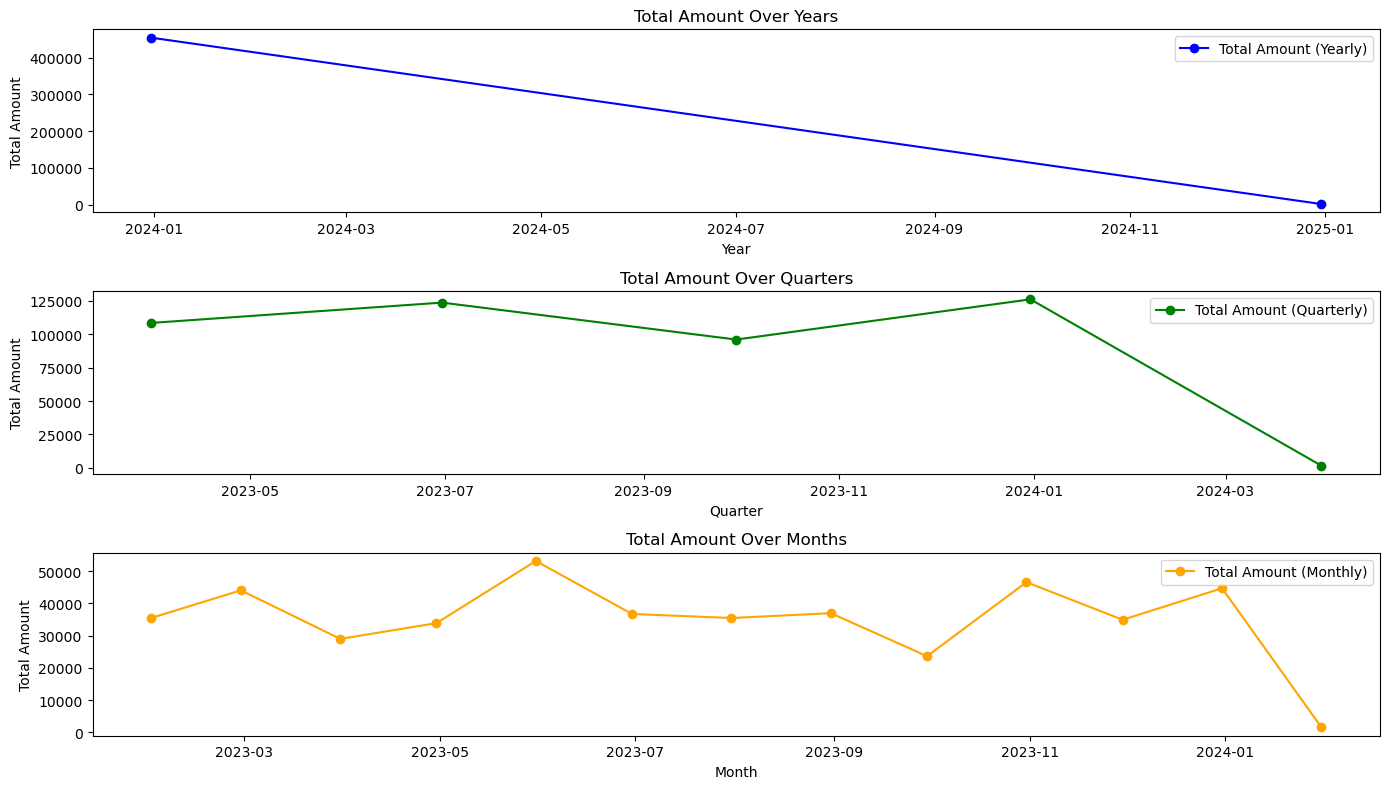

In [14]:
# Time Series Analysis

# Seting "Date" as the index for time series analysis
retail_sales.set_index("Date", inplace=True)

# Converting relevant columns to numeric type
numeric_columns = ["Total Amount", "Quantity", "Price per Unit"]
retail_sales[numeric_columns] = retail_sales[numeric_columns].apply(pd.to_numeric, errors ="coerce")

# Resample data for yearly, quarterly, and monthly frequency
yearly_data = retail_sales.resample("Y").sum()
quarterly_data = retail_sales.resample("Q").sum()
monthly_data = retail_sales.resample("M").sum()

# Plotting Total Amount for each frequency
plt.figure(figsize = (14, 8))

# Yearly Plot
plt.subplot(3, 1, 1)
plt.plot(yearly_data.index, yearly_data["Total Amount"], marker = "o", linestyle = "-", label = "Total Amount (Yearly)", color = "blue")
plt.title("Total Amount Over Years")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.legend()

# Quarterly Plot
plt.subplot(3, 1, 2)
plt.plot(quarterly_data.index, quarterly_data["Total Amount"], marker = "o", linestyle = "-", label = "Total Amount (Quarterly)", color = "green")
plt.title("Total Amount Over Quarters")
plt.xlabel("Quarter")
plt.ylabel("Total Amount")
plt.legend()

# Monthly Plot
plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, monthly_data["Total Amount"], marker = "o", linestyle = "-", label = "Total Amount (Monthly)", color = "orange")
plt.title("Total Amount Over Months")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.legend()

# Adjust layout for better appearance
plt.tight_layout() 
plt.show()


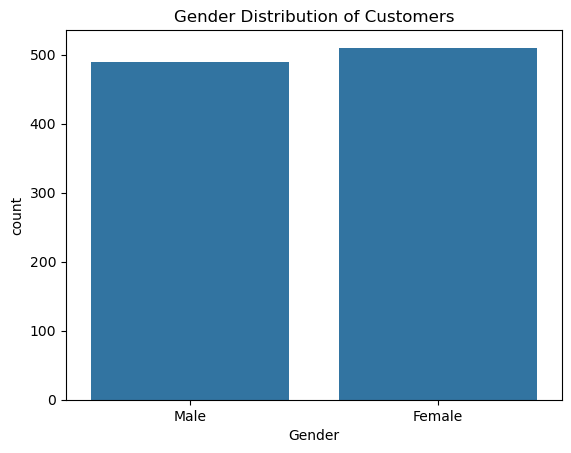

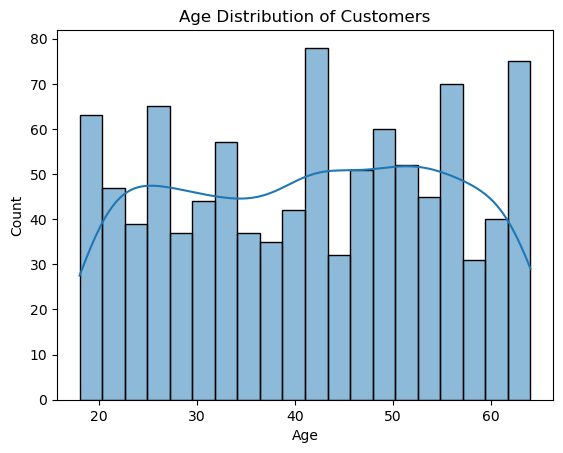

In [15]:
# Analyzing Customer Demographics
import seaborn as sns
import matplotlib.pyplot as plt

# Gender distribution
sns.countplot(x = "Gender", data = retail_sales)
plt.title("Gender Distribution of Customers")
plt.show()

# Age distribution
sns.histplot(x = "Age", data = retail_sales, bins = 20, kde = True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.show()


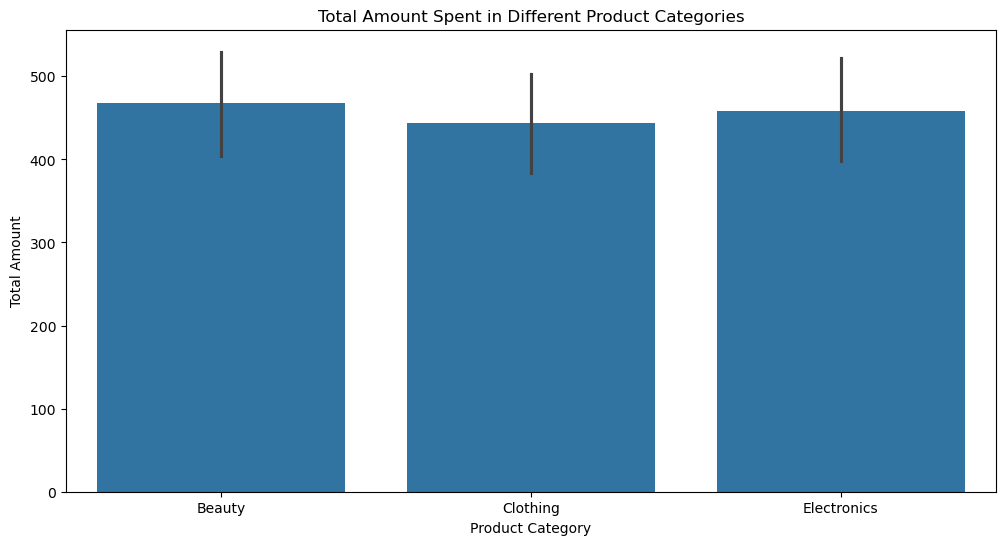

C:\Users\kchuc\AppData\Local\Temp\ipykernel_11572\332786542.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = "Date", y = "Quantity", data = retail_sales, ci = None)


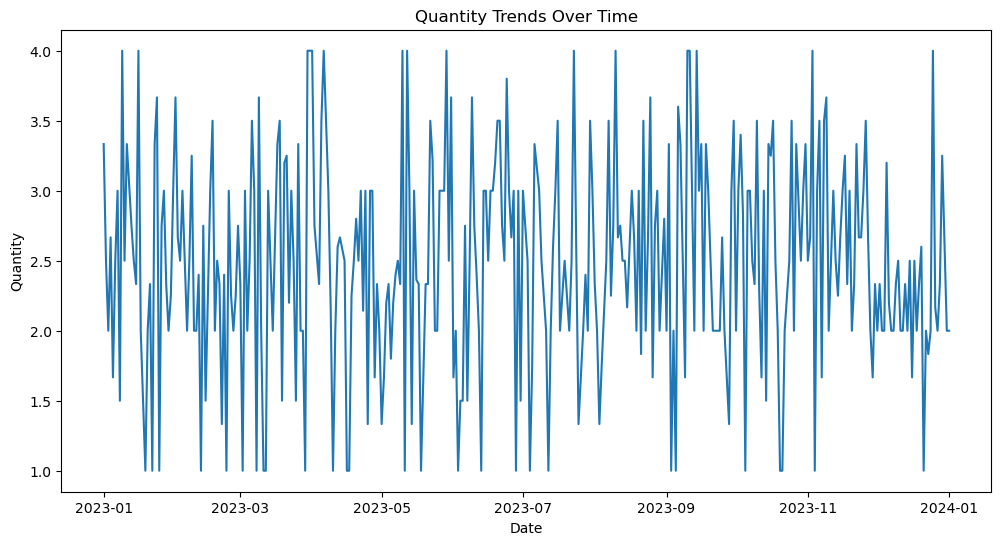

C:\Users\kchuc\AppData\Local\Temp\ipykernel_11572\332786542.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = "Date", y = "Price per Unit", data = retail_sales, ci=None)


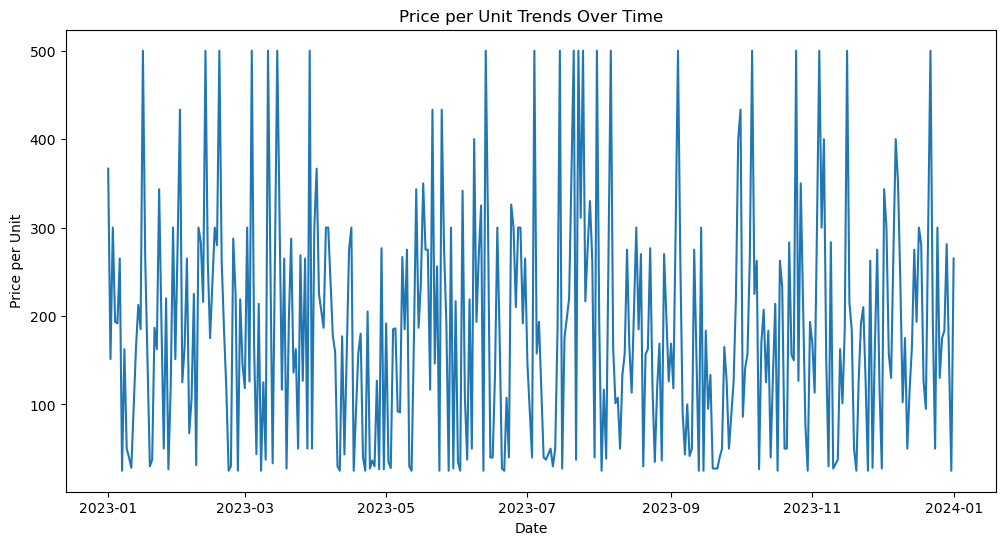

In [16]:
# Analyzing Purchasing Behavior
# Total amount spent in different product categories
plt.figure(figsize = (12, 6))
sns.barplot(x = "Product Category", y = "Total Amount", data = retail_sales)
plt.title("Total Amount Spent in Different Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

# Quantity trends
plt.figure(figsize = (12, 6))
sns.lineplot(x = "Date", y = "Quantity", data = retail_sales, ci = None)
plt.title("Quantity Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.show()

# Price per unit trends
plt.figure(figsize = (12, 6))
sns.lineplot(x = "Date", y = "Price per Unit", data = retail_sales, ci=None)
plt.title("Price per Unit Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Price per Unit")
plt.show()
